<b>How to pick p,d,q for ARIMA?</b>
<code>
  p = the number of lag terms to use in the autoregressive process
  d = The differencing to use
  q = The number of terms in the moving average process

  The parameters {p,d,q} could be picked by using a grid search
  It seems "d" is picked using intution and by playing with the data.
  If "d" is fixed, a way to pick p and q is to perform a grid search:
  
  https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/
  
  In the above link, the MSE value of y(t+1) and y_hat(t+1) is calculated.
  This optimizes for predicting the next data point. This could be adjusted so
  that picking the next K points is minimized.
  
  Another method, is to pick parameters P,d,q such that the model minimizes AIC:
  
  AIC = -2log(L) + 2(p + q + k + 1)
  
  There is also a corrected AIC:
  
  AIC_c = AIC + 2(p + q + k + 1)(p + q + k + 2) / [(T - p - q - k - 2)]
</code>


<b>What is a lag variable</b>

    e.g., y(t-1)

<b>What is an ACF (auto correlation function)</b>

   ACF(0) = 1., ACF(1) = ?, etc.
   ACF(n=number of time periods between points)
   
   
<b>What is a partial autocorrelation function?</b>

    PACF(0) = ...
    Concept here is that correlations exist because of chaining effect.
    That is, x(t) and x(t-2) are only related to each other because x(t) is related to
    x(t-1) and x(t-1) is related to x(t-2). So somehow accounts for this...

* Measurements we see in practice (emails, print jobs) will not occur at regular intervals.
  How will this affect our analysis?

<b>What is a weakly stationary series?</b>
    Definition: A series xt is said to be (weakly) stationary if it satisfies the following properties:

        The mean E(xt) is the same for all t.
        The variance of xt is the same for all t.
        The covariance (and also correlation) between xt and xt-h is the same for all t.
    

<b>What is the difference between autocorrelation and autoregression?</b>

    The autocorrelation, is the actual correlation of say y_t vs y_(t-1). Where as autoregression, is the regression against all previous data points.

Plot y(t) vs y(t-1)

And also calculation autocorrelation

# Load The Data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# "Month","Monthly milk production: pounds per cow. Jan 62 ? Dec 75"
# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line
# https://datamarket.com/data/list/?q=provider:tsdl

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m')
df = pd.read_csv('../../data/monthly-milk-production-pounds-p.csv',
                 names=['date', 'production'],
                 parse_dates=['date'],
                 date_parser=dateparse,
                 index_col=['date'])
df.head()

,production
date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


# Visualize The Data

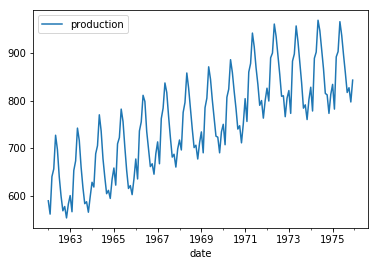

In [3]:
# Plot the data
df.plot()

### Lag plots

[]

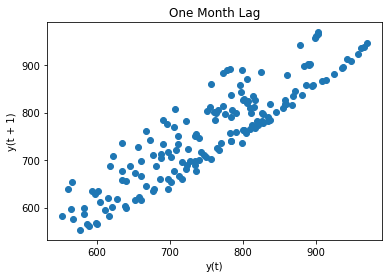

In [4]:
from pandas.plotting import lag_plot
lag_plot(df, lag=1)
plt.title("One Month Lag")
plt.plot()

[]

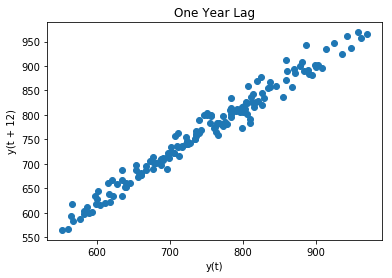

In [5]:
lag_plot(df, lag=12)
plt.title("One Year Lag")
plt.plot()

### Autocorrelation Plot
View the pearson correlation coefficients for various lag values


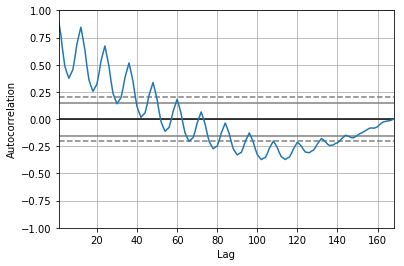

In [6]:
# Black line is mean of series
# Dashed line is 99% confidence region
# Grey line is 95% confidence region
# How are confidence intervals calculated? What is the null hypothesis?
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)

/Users/MattJohnson/Development/git/long-range-extrapolation/.pythonenv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[]

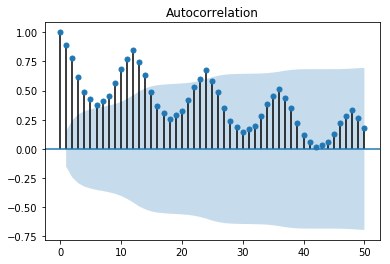

In [7]:
# Same as above, but line plot instead
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=50)
plt.plot()

# Autoregressive Process

In [8]:
# Lag model of 14 is very close to 12 months
from statsmodels.tsa.ar_model import AR
model = AR(df)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 14
Coefficients: const             11.867312
L1.production      0.712417
L2.production      0.157681
L3.production      0.010897
L4.production     -0.024439
L5.production     -0.009814
L6.production      0.007396
L7.production      0.021716
L8.production     -0.023596
L9.production     -0.003015
L10.production     0.015765
L11.production    -0.002420
L12.production     0.971952
L13.production    -0.705307
L14.production    -0.141295
dtype: float64
